In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [43]:
df = pd.read_csv("new_incidents.csv", low_memory=False)
df_cut = df.copy()
df_cut = df_cut[['n_participants', 'n_involved', 'age_to_average', 'par_to_tot']]
df_cut.head()

,n_participants,n_involved,age_to_average,par_to_tot
0,1.0,1,0.647020,0.009091
1,2.0,1,1.566469,0.018182
2,2.0,1,0.749181,0.018182
3,2.0,1,0.851342,0.018182
4,2.0,2,0.817288,0.018182


In [44]:
df_cut.describe()

,n_participants,n_involved,age_to_average,par_to_tot
count,183654.000000,183654.000000,183654.000000,183654.000000
mean,1.810464,0.841261,1.000000,0.014124
std,1.133149,0.801174,0.371445,0.026565
min,1.000000,0.000000,0.000000,0.001143
25%,1.000000,0.000000,0.779711,0.003968
50%,2.000000,1.000000,0.916204,0.007246
75%,2.000000,1.000000,1.110437,0.014493
max,35.000000,27.000000,3.493709,1.000000


In [45]:
def normalization(df):
    scaler = MinMaxScaler()
    norm = scaler.fit_transform(df.values)
    df_norm = pd.DataFrame(norm, columns=df.columns)
    return df_norm

df_norm = df_cut.copy()
df_norm = normalization(df_norm)
df_norm.head()

,n_participants,n_involved,age_to_average,par_to_tot
0,0.000000,0.037037,0.185196,0.007957
1,0.029412,0.037037,0.448368,0.017058
2,0.029412,0.037037,0.214437,0.017058
3,0.029412,0.037037,0.243678,0.017058
4,0.029412,0.074074,0.233931,0.017058


Calculated k-means with k equal to 2
Calculated k-means with k equal to 3
Calculated k-means with k equal to 4
Calculated k-means with k equal to 5
Calculated k-means with k equal to 6
Calculated k-means with k equal to 7
Calculated k-means with k equal to 8
Calculated k-means with k equal to 9
Calculated k-means with k equal to 10
Calculated k-means with k equal to 11
Calculated k-means with k equal to 12
Calculated k-means with k equal to 13
Calculated k-means with k equal to 14
Calculated k-means with k equal to 15
Calculated k-means with k equal to 16
Calculated k-means with k equal to 17
Calculated k-means with k equal to 18
Calculated k-means with k equal to 19
Calculated k-means with k equal to 20


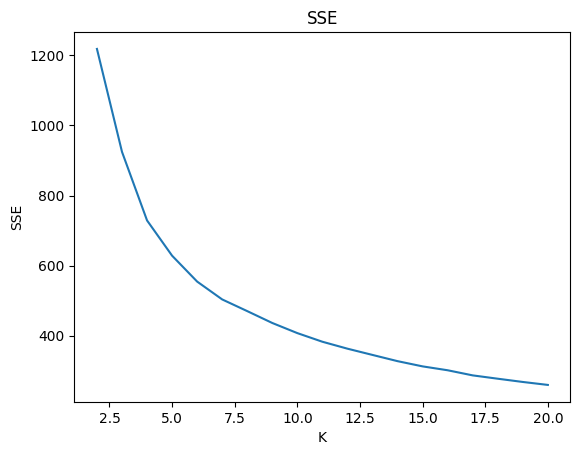

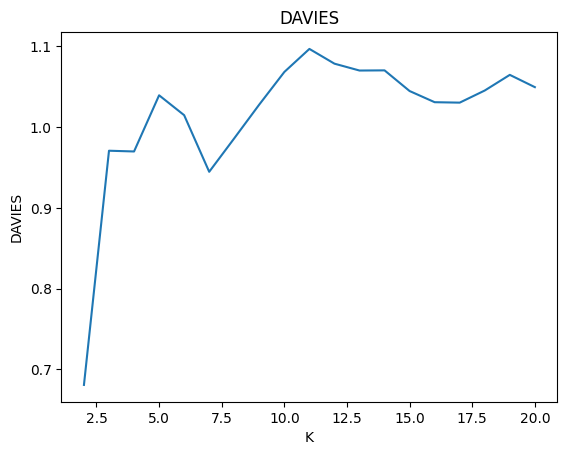

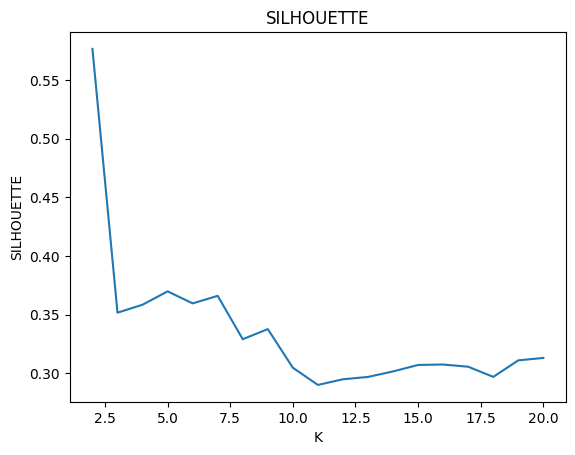

In [9]:
def k_means_calculation(df):
    sse = list()
    davies = list()
    silhouette = list()
    max_k = 20
    for k in range(2, max_k + 1):
        kmeans_pass = KMeans(n_clusters=k, n_init=10, max_iter=100)
        kmeans_pass.fit(df)
        sse_pass = kmeans_pass.inertia_
        sse.append(sse_pass)
        davies.append(davies_bouldin_score(df, kmeans_pass.labels_))
        silhouette.append(silhouette_score(df, kmeans_pass.labels_))
        print("Calculated k-means with k equal to " + str(k))
    plt.plot(range(2, len(sse) + 2), sse)
    plt.ylabel('SSE')
    plt.xlabel('K')
    plt.title('SSE')
    plt.show()
    plt.plot(range(2, len(davies) + 2), davies)
    plt.ylabel('DAVIES')
    plt.xlabel('K')
    plt.title('DAVIES')
    plt.show()
    plt.plot(range(2, len(silhouette) + 2), silhouette)
    plt.ylabel('SILHOUETTE')
    plt.xlabel('K')
    plt.title('SILHOUETTE')
    plt.show()

k_means_calculation(df_norm)

In [14]:
kmeans = KMeans(n_clusters = 7, n_init=100, random_state=42)
kmeans.fit(df_norm)
n_clusters = len(np.unique(kmeans.labels_))
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(kmeans.labels_ == k))
print('cluster occurrencies:', occ_list)

cluster occurrencies: [14692, 80203, 39581, 27616, 14925, 5347, 1290]


In [46]:
df_cut['Cluster'] = kmeans.labels_
df_cut.head()

,n_participants,n_involved,age_to_average,par_to_tot,Cluster
0,1.0,1,0.647020,0.009091,2
1,2.0,1,1.566469,0.018182,4
2,2.0,1,0.749181,0.018182,2
3,2.0,1,0.851342,0.018182,1
4,2.0,2,0.817288,0.018182,1


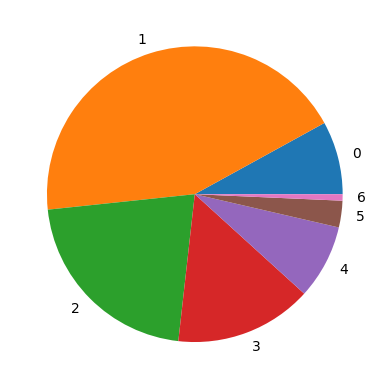

In [47]:
label = range(n_clusters)
plt.pie(occ_list, labels=label, colors=sn.color_palette(n_colors=n_clusters))
plt.show()

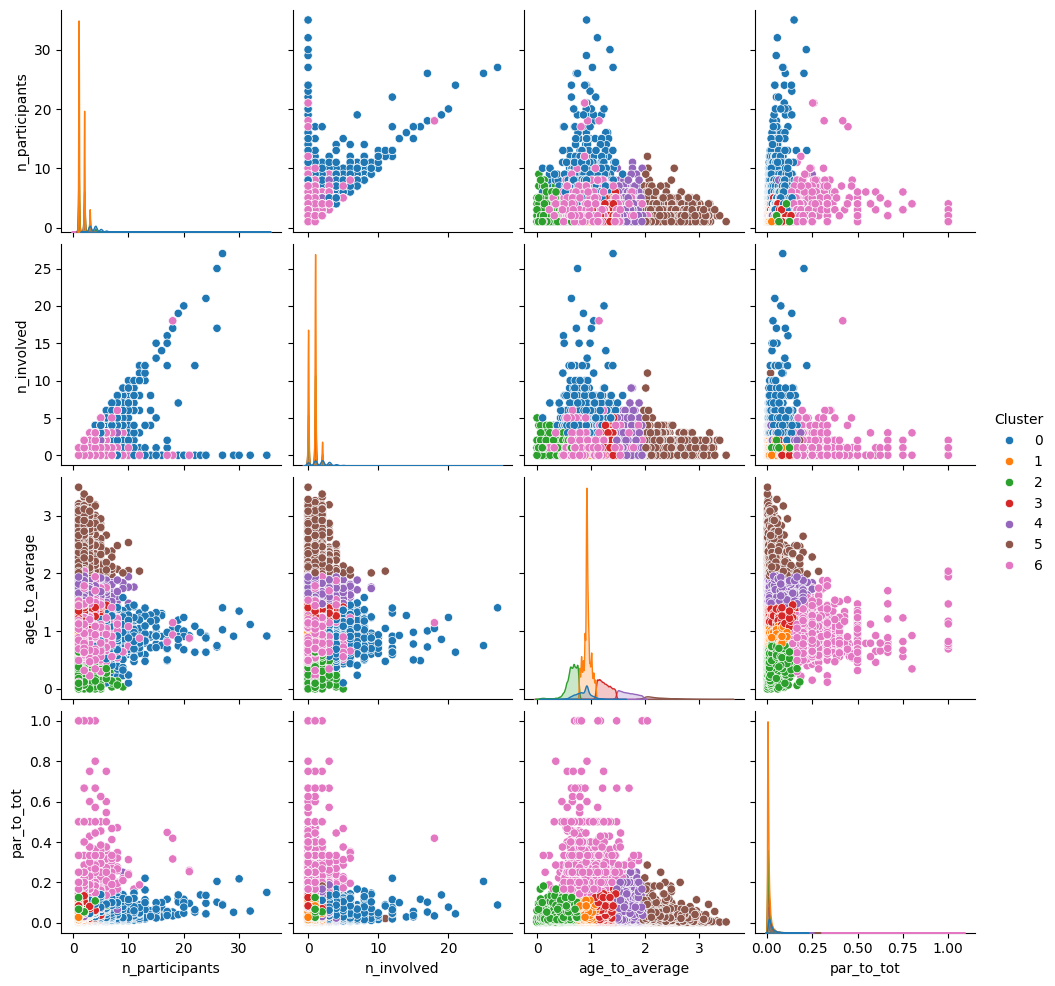

In [48]:
sn.pairplot(df_cut,hue='Cluster', palette=sn.color_palette(n_colors=n_clusters))
plt.show()

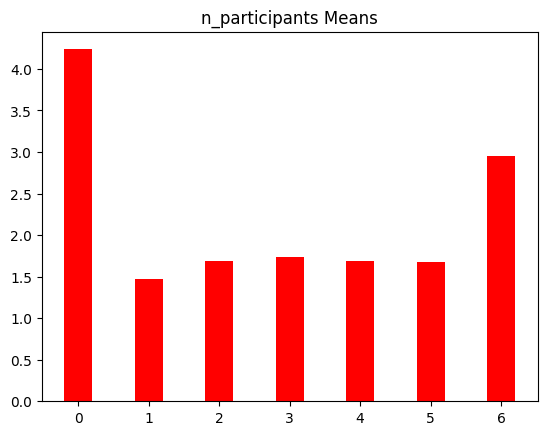

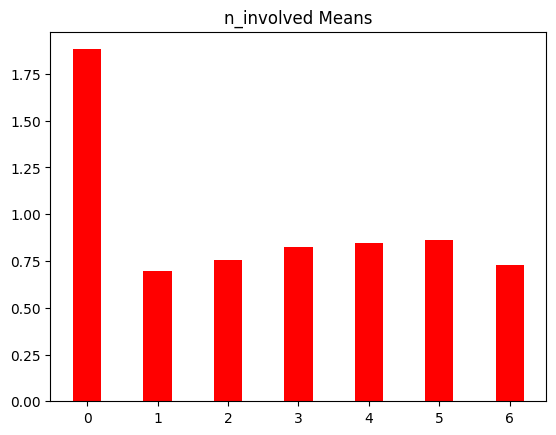

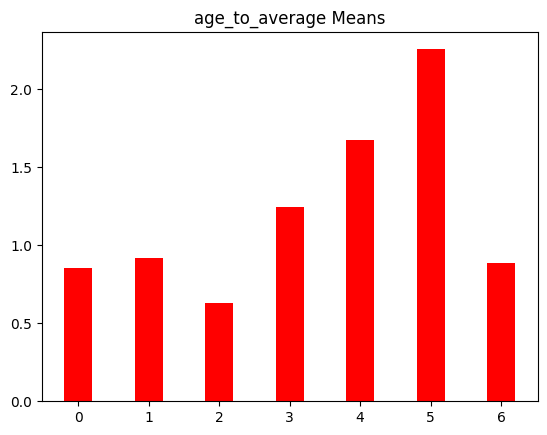

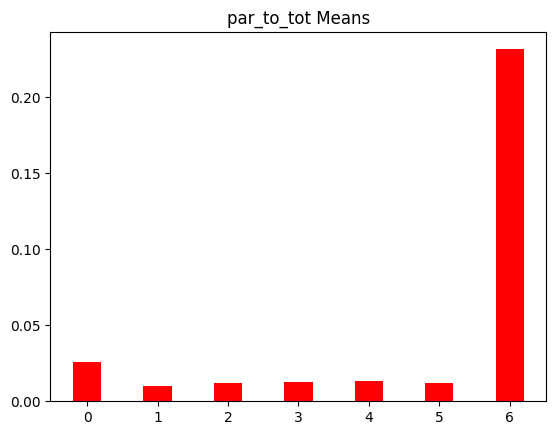

In [42]:
cols = df_cut.columns
for col in range(len(cols)-1):
    means = []
    for x in label:
        temp = df_cut[df_cut['Cluster'] == x]
        temp = temp.drop(columns=['Cluster'])
        means.append(temp.describe()[cols[col]][1])
    plt.bar(label, means, color ='red', 
            width = 0.4)
    plt.title(cols[col] + " Means")
    plt.show()   

In [ ]:
# 0 = Very High number of participants and involved that don't make up the bulk of the states total (14k)
# 1 = Low number of participants and around average age (80k)
# 2 = Average number of participants below average age (39k)
# 3 = Average number of participants above average age (27k)
# 4 = Average number of participants above average age (higher than 3) (15k)
# 5 = Average number of participants with very high average age (5k)
# 6 = High number of participants that make up the bulk of the states total (1k)

#Perhaps we could merge 3 and 4

In [55]:
df_cut[df_cut['Cluster'] == 3].describe()

,n_participants,n_involved,age_to_average,par_to_tot,Cluster
count,27616.000000,27616.000000,27616.000000,27616.000000,27616.0
mean,1.730555,0.822530,1.246022,0.012813,3.0
std,0.849408,0.687047,0.106089,0.016548,0.0
min,1.000000,0.000000,1.064939,0.001143,3.0
25%,1.000000,0.000000,1.152867,0.004082,3.0
50%,2.000000,1.000000,1.234143,0.007407,3.0
75%,2.000000,1.000000,1.335225,0.014085,3.0
max,8.000000,5.000000,1.459140,0.166667,3.0


In [56]:
df_cut[df_cut['Cluster'] == 4].describe()

,n_participants,n_involved,age_to_average,par_to_tot,Cluster
count,14925.000000,14925.000000,14925.000000,14925.000000,14925.0
mean,1.690318,0.845896,1.671854,0.013344,4.0
std,0.867017,0.736878,0.141597,0.019241,0.0
min,1.000000,0.000000,1.457681,0.001143,4.0
25%,1.000000,0.000000,1.548586,0.004065,4.0
50%,2.000000,1.000000,1.657856,0.007407,4.0
75%,2.000000,1.000000,1.785098,0.014493,4.0
max,11.000000,9.000000,1.964481,0.250000,4.0


In [144]:
df_cut['Cluster'] = df_cut['Cluster'].replace(4, 3)
df_cut['Cluster'] = np.where(df_cut['Cluster'] > 3, df_cut['Cluster'] -1, df_cut['Cluster'])
df_cut[df_cut['Cluster'] == 3].describe()

# They differ only on age, they cover similar age groups, so it's ok!

,n_participants,n_involved,age_to_average,par_to_tot,Cluster
count,47888.000000,47888.000000,47888.000000,47888.000000,47888.0
mean,1.711932,0.834364,1.491171,0.012912,3.0
std,0.856909,0.709210,0.359989,0.017520,0.0
min,1.000000,0.000000,1.064939,0.001143,3.0
25%,1.000000,0.000000,1.211651,0.004065,3.0
50%,2.000000,1.000000,1.384752,0.007353,3.0
75%,2.000000,1.000000,1.682112,0.014085,3.0
max,12.000000,11.000000,3.493709,0.285714,3.0


cluster occurrencies: [14692, 80203, 39581, 42541, 5347, 1290]


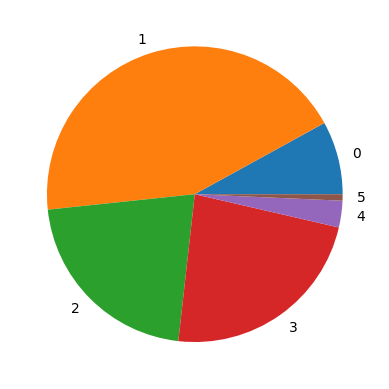

In [68]:
n_clusters = len(np.unique(df_cut['Cluster']))
label = range(n_clusters)
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(df_cut['Cluster'] == k))
print('cluster occurrencies:', occ_list)
plt.pie(occ_list, labels=label, colors=sn.color_palette(n_colors=n_clusters))
plt.show()

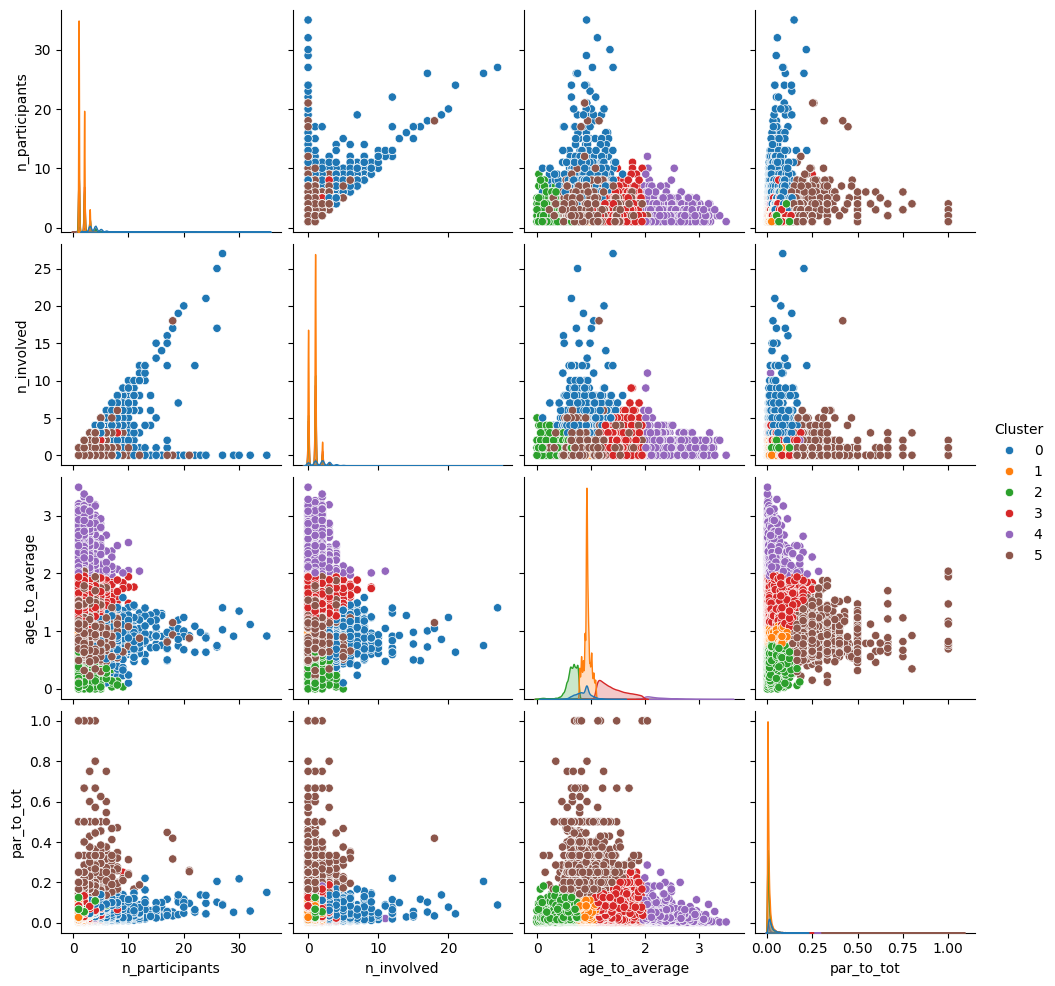

In [67]:
sn.pairplot(df_cut,hue='Cluster', palette=sn.color_palette(n_colors=n_clusters))
plt.show()

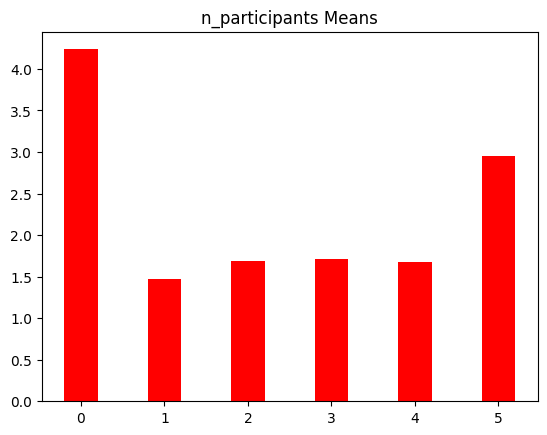

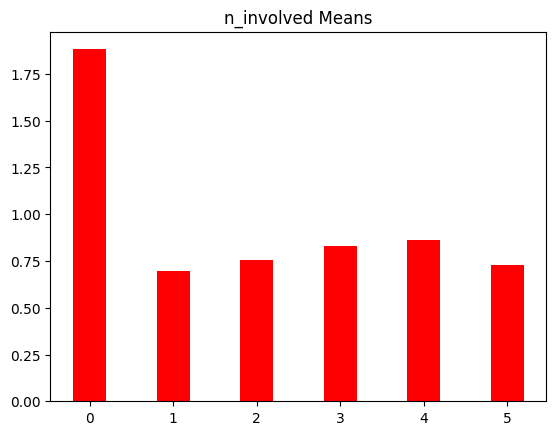

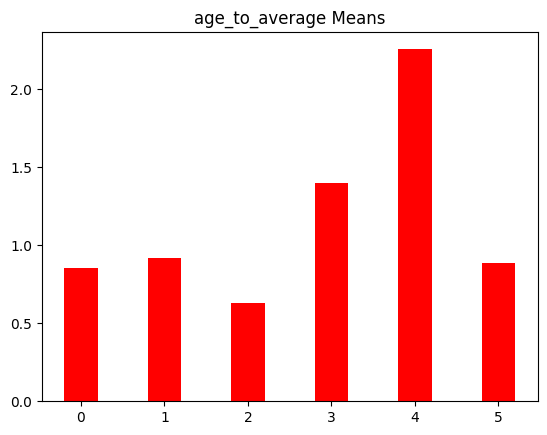

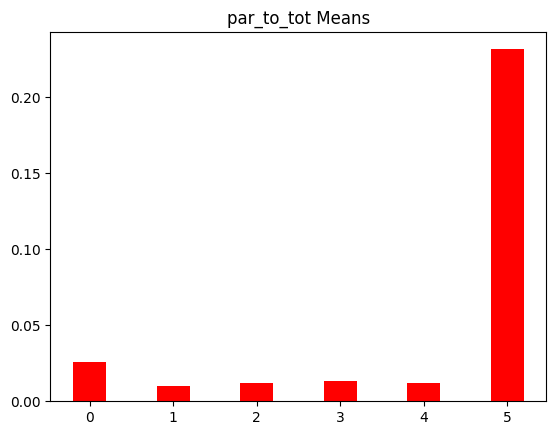

In [69]:
cols = df_cut.columns
for col in range(len(cols)-1):
    means = []
    for x in label:
        temp = df_cut[df_cut['Cluster'] == x]
        temp = temp.drop(columns=['Cluster'])
        means.append(temp.describe()[cols[col]][1])
    plt.bar(label, means, color ='red', 
            width = 0.4)
    plt.title(cols[col] + " Means")
    plt.show()   

In [ ]:
# 0 = Very High number of participants and involved that don't make up the bulk of the states total (14k)
# 1 = Low number of participants around average age (80k)
# 2 = Average number of participants below average age (39k)
# 3 = Average number of participants above average age (42k)
# 4 = Average number of participants with very high average age (5k)
# 5 = High number of participants but low involved that make up the bulk of the states total (1k)

In [70]:
df['Cluster'] = df_cut['Cluster']
df.head()

,state,city_or_county,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,...,man_to_p,fem_to_p,arr_to_p,unh_to_p,inj_to_p,n_minors,teen_to_m,teen_to_f,par_to_tot,Cluster
0,Indiana,Indianapolis,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.009091,2
1,Indiana,Gary,41.5982,-87.3488,1.0,32.0,46.0,59.0,0.0,0.0,...,1.0,0.0,0.0,0.5,0.0,0.0,0.0,NaN,0.018182,3
2,Indiana,Bloomington,39.1593,-86.5272,9.0,22.0,22.0,23.0,0.0,0.0,...,0.5,0.0,0.5,0.0,0.5,0.0,0.0,NaN,0.018182,2
3,Indiana,Gary,41.6123,-87.2685,1.0,25.0,25.0,25.0,0.0,0.0,...,1.0,0.0,0.0,0.5,0.5,0.0,0.0,NaN,0.018182,1
4,Indiana,Gary,41.5918,-87.2895,1.0,22.0,24.0,25.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.5,0.0,0.0,NaN,0.018182,1


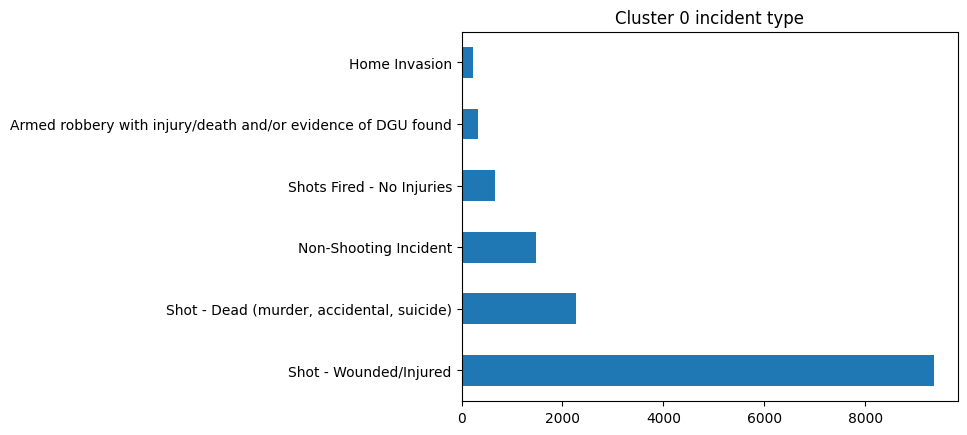

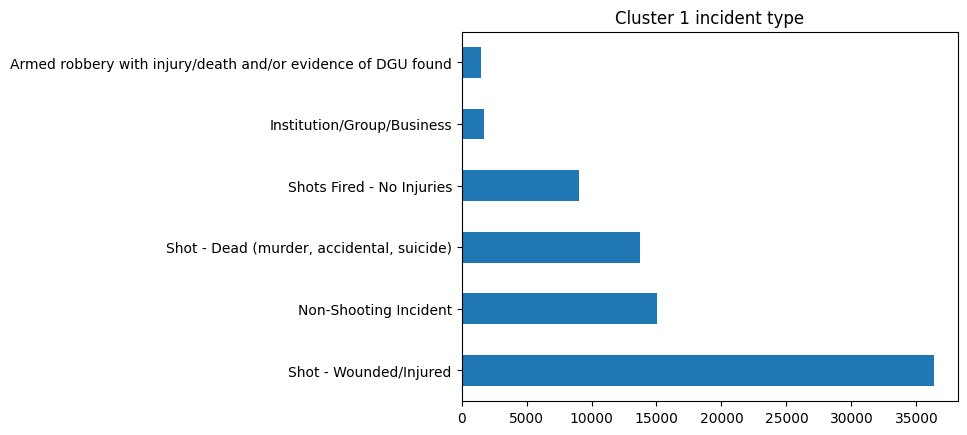

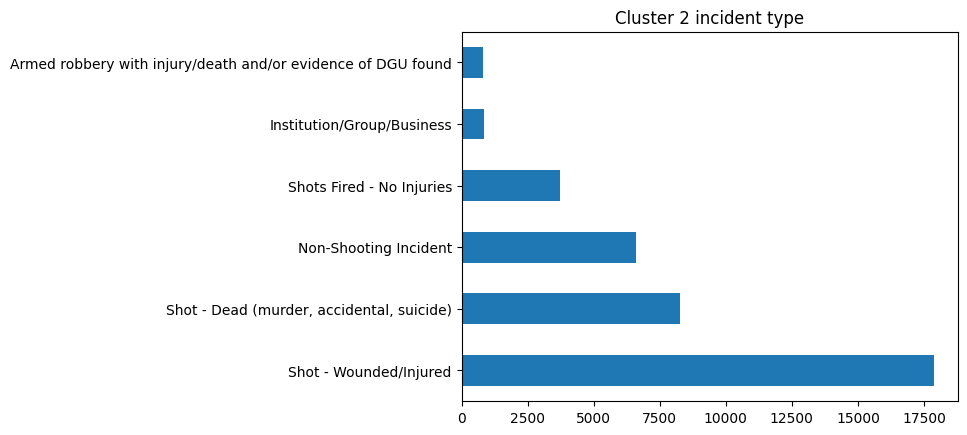

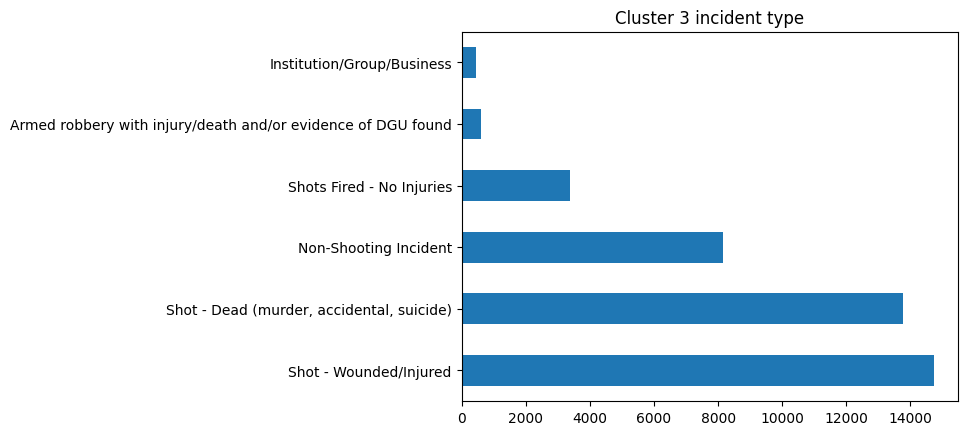

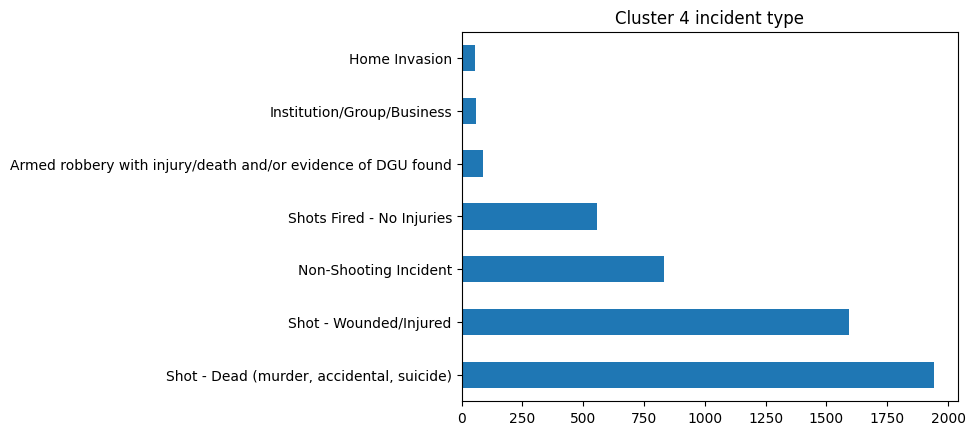

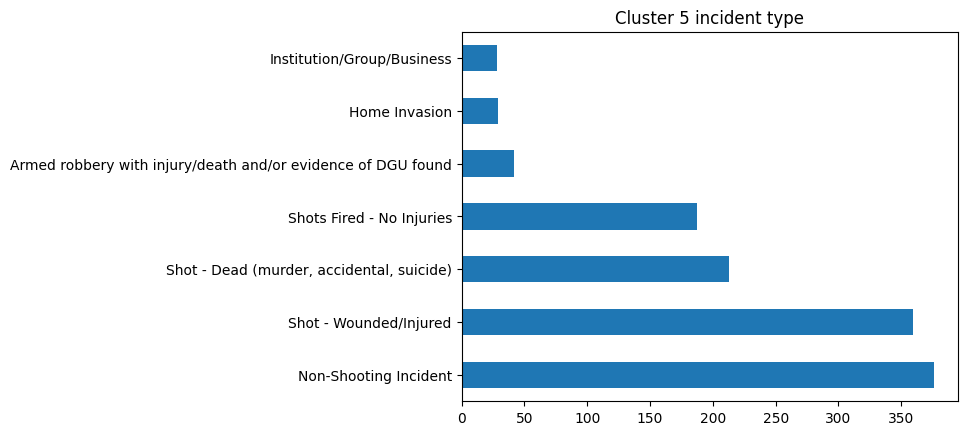

In [151]:
for k in range(n_clusters):  
    temp = df[df['Cluster'] == k]
    incident_type = temp['incident_characteristics1'].value_counts()
    incident_type = incident_type[incident_type >= (len(temp)*0.01)]
    incident_type.plot(kind='barh', linewidth=1)
    plt.title("Cluster " + str(k) + " incident type")
    plt.show()

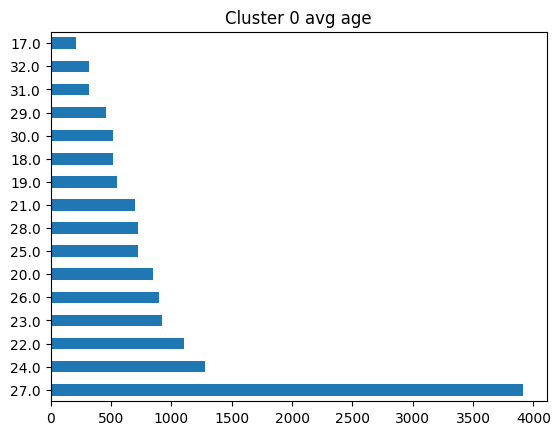

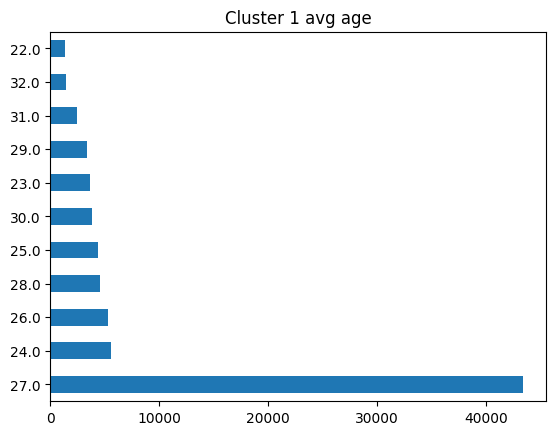

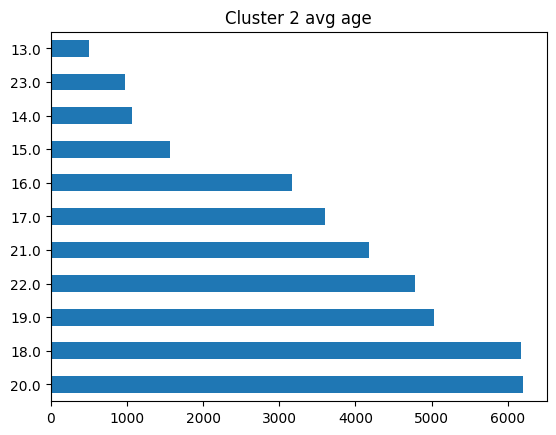

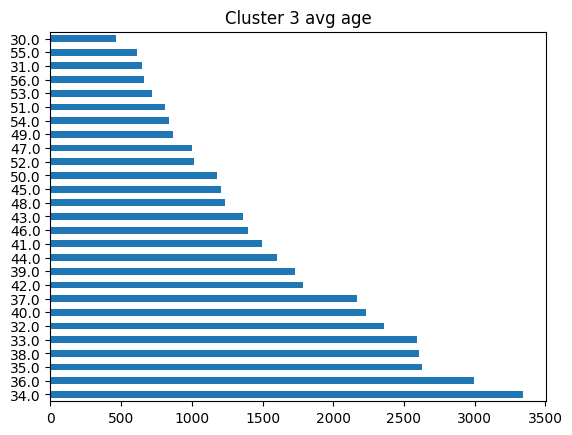

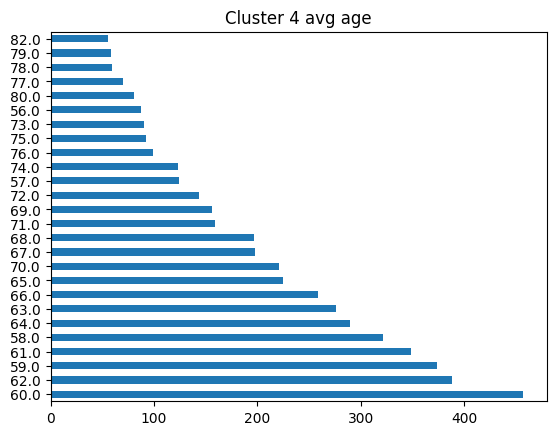

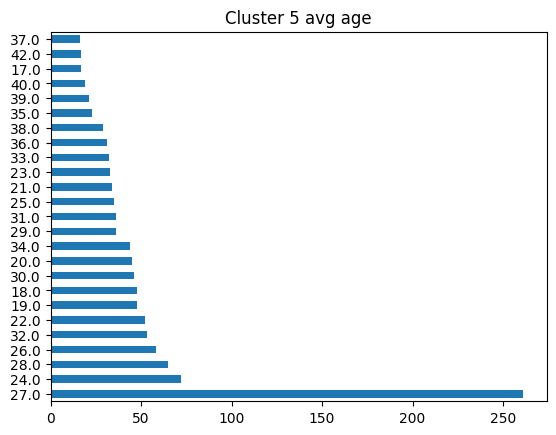

In [156]:
for k in range(n_clusters):  
    temp = df[df['Cluster'] == k]
    avg_age = temp['avg_age_participants'].value_counts()
    avg_age = avg_age[avg_age >= (len(temp)*0.01)]
    avg_age.plot(kind='barh', linewidth=1)
    plt.title("Cluster " + str(k) + " avg age")
    plt.show()

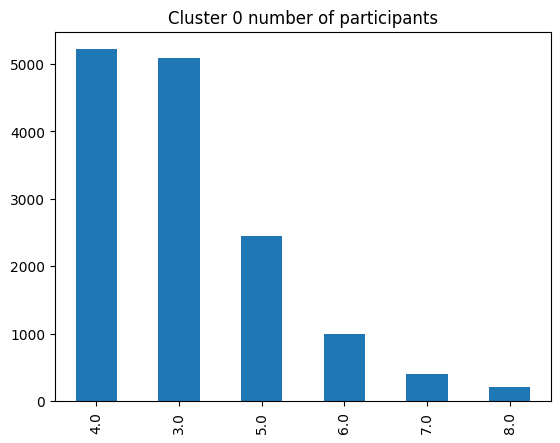

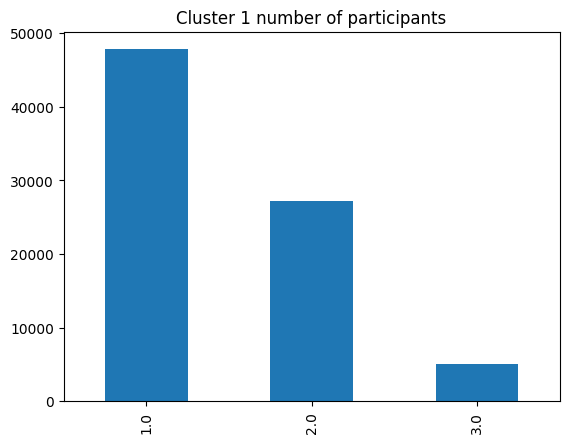

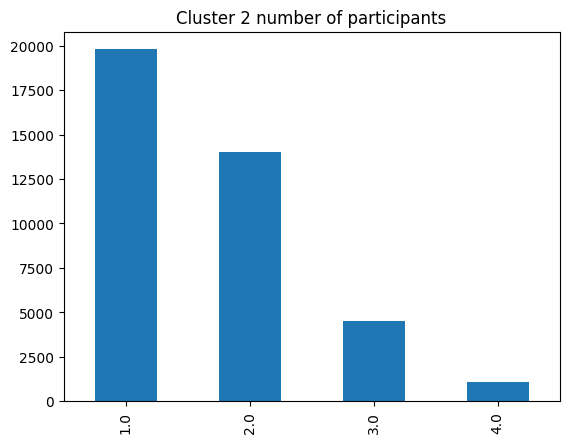

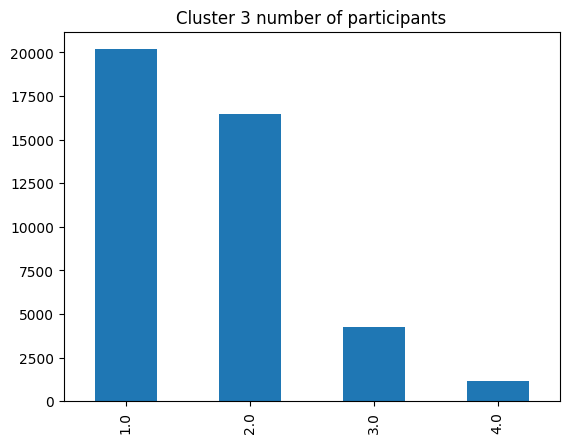

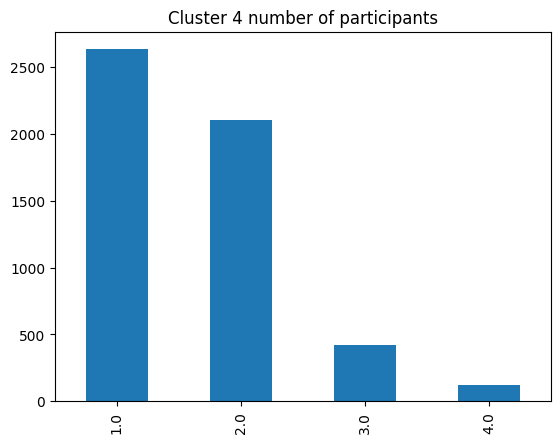

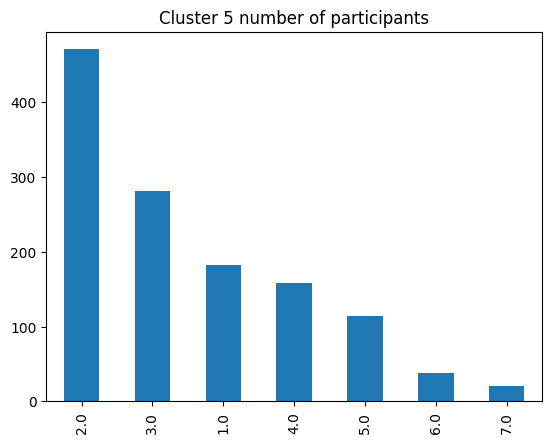

In [148]:
for k in range(n_clusters):  
    temp = df[df['Cluster'] == k]
    num_par = temp['n_participants'].value_counts()
    num_par = num_par[num_par >= (len(temp)*0.01)]
    num_par.plot(kind='bar', linewidth=1)
    plt.title("Cluster " + str(k) + " number of participants")
    plt.show()

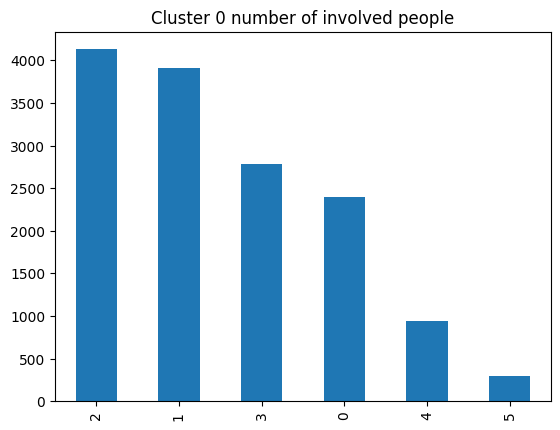

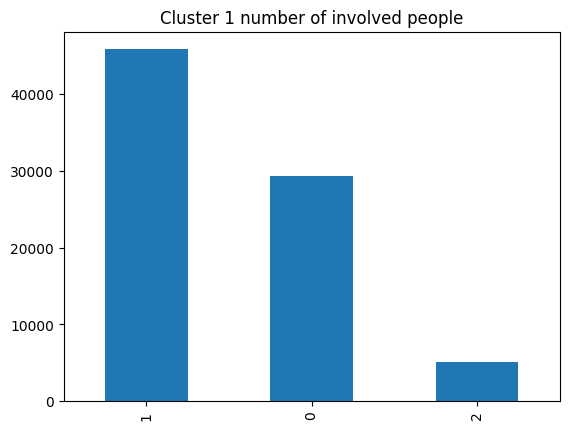

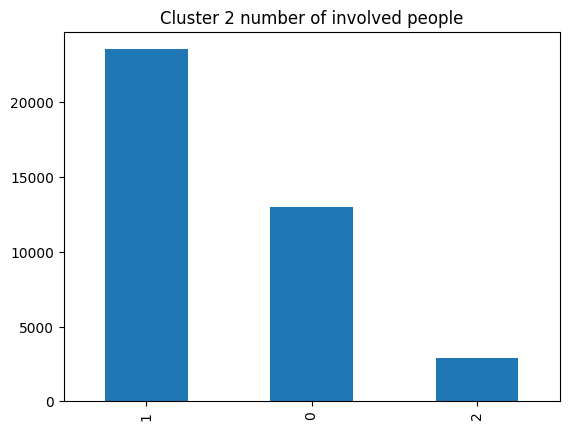

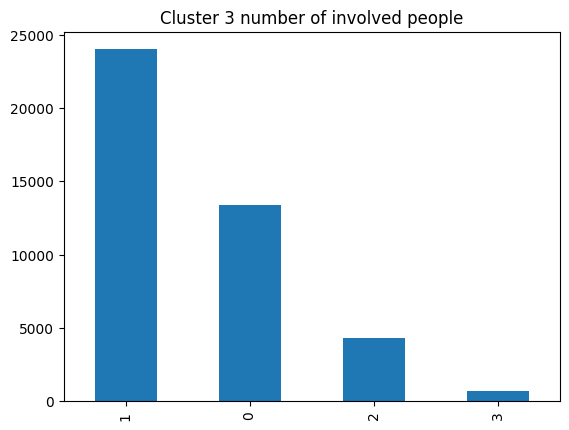

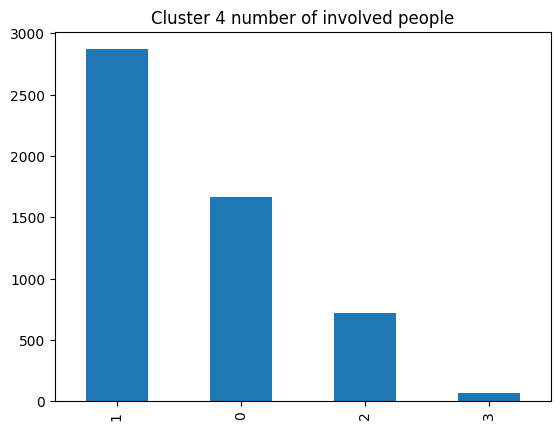

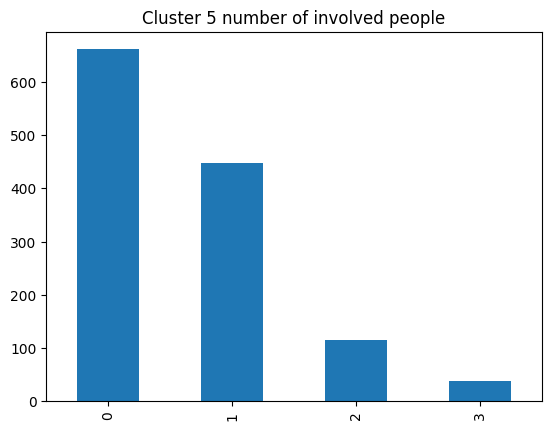

In [154]:
for k in range(n_clusters):  
    temp = df[df['Cluster'] == k]
    num_inv = temp['n_involved'].value_counts()
    num_inv = num_inv[num_inv >= (len(temp)*0.01)]
    num_inv.plot(kind='bar', linewidth=1)
    plt.title("Cluster " + str(k) + " number of involved people")
    plt.show()

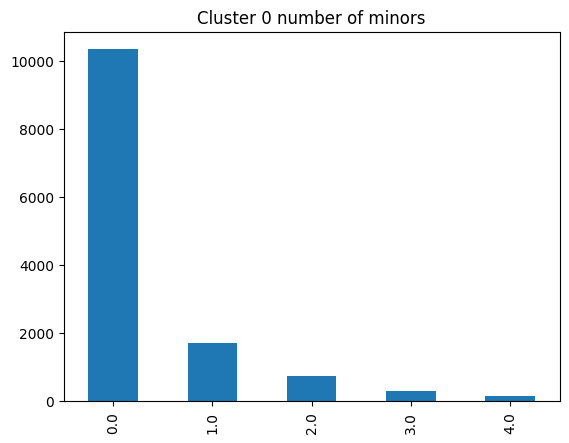

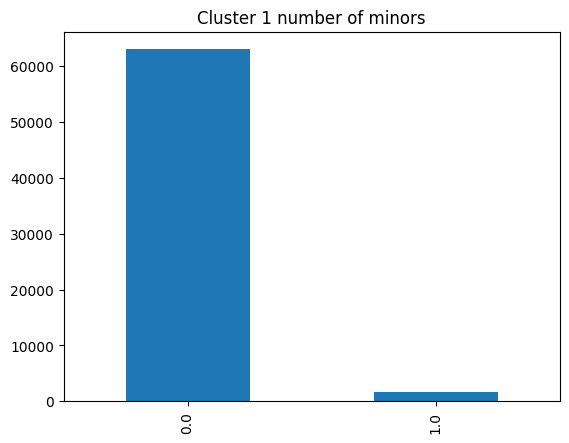

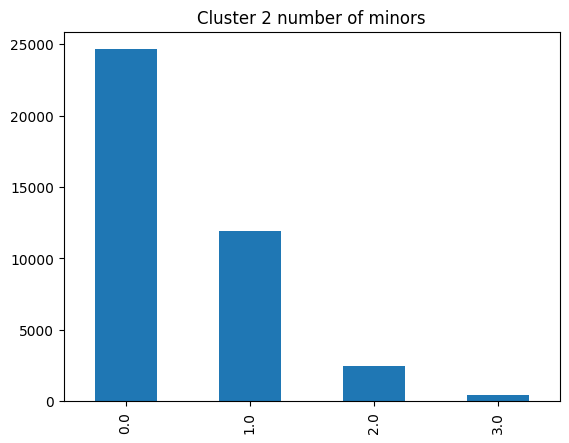

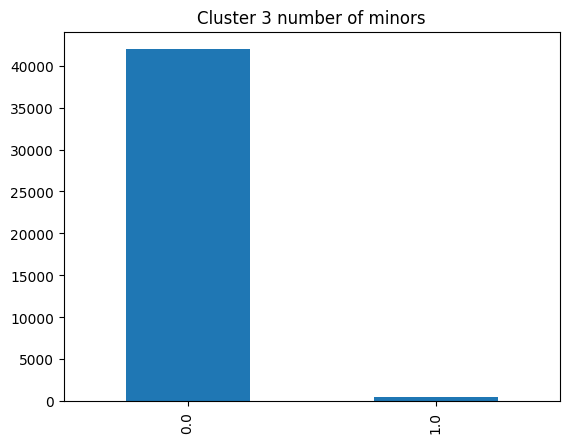

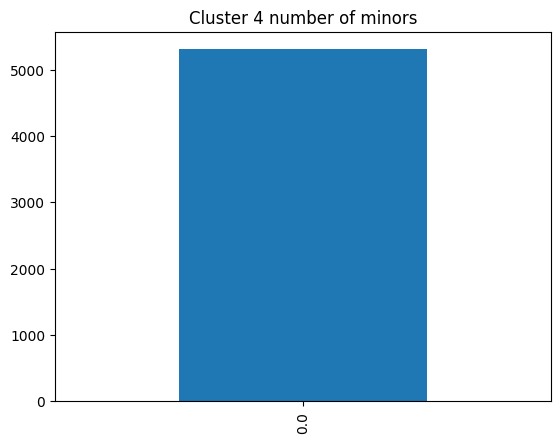

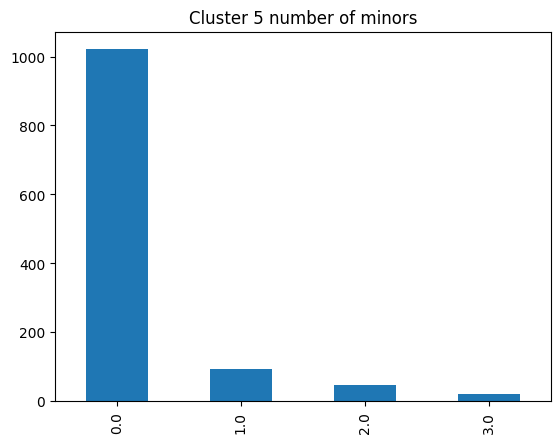

In [155]:
for k in range(n_clusters):  
    temp = df[df['Cluster'] == k]
    num_min = temp['n_minors'].value_counts()
    num_min = num_min[num_min >= (len(temp)*0.01)]
    num_min.plot(kind='bar', linewidth=1)
    plt.title("Cluster " + str(k) + " number of minors")
    plt.show()

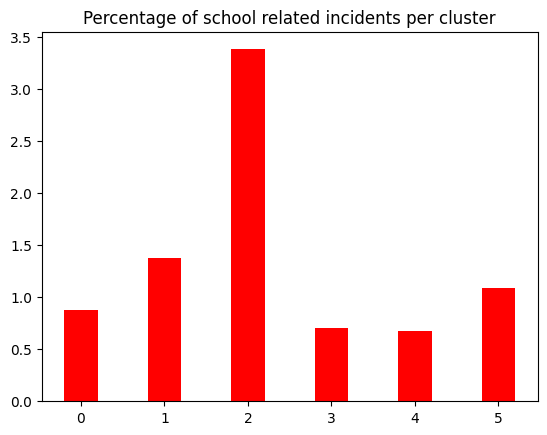

In [158]:
school_percentage = []
for k in range(n_clusters):  
    temp = df[df['Cluster'] == k]
    total_row = len(temp)
    temp = temp[(temp['incident_characteristics1'].str.lower().str.contains('school', na=False)) | (temp['incident_characteristics2'].str.lower().str.contains('school', na=False)) | (temp['notes'].str.lower().str.contains('school', na=False))]
    partial_row = len(temp)
    percentage = (partial_row/total_row)*100
    school_percentage.append(percentage)
plt.bar(label, school_percentage, color ='red', width = 0.4)
plt.title("Percentage of school related incidents per cluster")
plt.show()

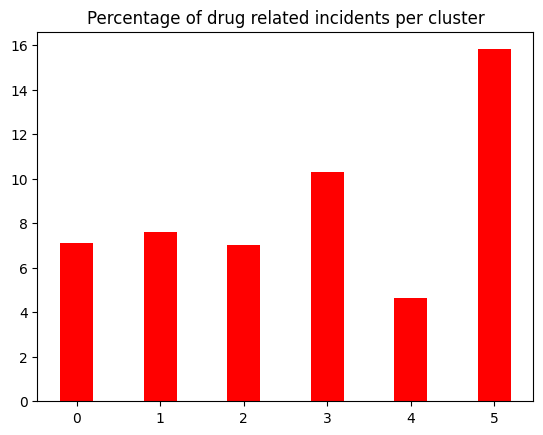

In [141]:
drug_percentage = []
for k in range(n_clusters):  
    temp = df[df['Cluster'] == k]
    total_row = len(temp)
    temp = temp[(temp['incident_characteristics1'].str.lower().str.contains('drug', na=False)) | (temp['incident_characteristics2'].str.lower().str.contains('drug', na=False)) | (temp['notes'].str.lower().str.contains('drug', na=False))]
    partial_row = len(temp)
    percentage = (partial_row/total_row)*100
    drug_percentage.append(percentage)
plt.bar(label, drug_percentage, color ='red', width = 0.4)
plt.title("Percentage of drug related incidents per cluster")
plt.show()

In [142]:
# Average incident = low number of participants and people involved (killed + injured)

# Cluster 0 = Incidents with a lot of participants and high number of people involved (high number of involved => mass shootings)
# Cluster 1 = Average incidents involving mostly young adults
# Cluster 2 = Average incidents involving mostly minors and very young adults
# Cluster 3 = Average incidents involving mostly middle aged adults
# Cluster 4 = Average incidents involving mostly elderly
# Cluster 5 = Incidents with a lot of participants and low number of people involved (Almost null number of minors => probably drug related)